# Kickstarter

In [2]:
# Mount to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import data and necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/Copy of ks-projects-201801.csv')

## **Step 1: Exploration Ideas**

Audience: Project owners who are considering to use Kickstarter

Possible Big Questions:
- What are the most lucrative categories on Kickstarter?
- The trend of Number of Projects and Success Rate over time?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [5]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


## **Step 2: Data Cleaning**

Drop the columns `currency`, `goal`, `pledged`, `usd_pledged` since we won't use them for our analysis.

In [6]:
df.drop(columns=['currency', 'goal', 'pledged', 'usd pledged'], inplace=True)

Change the columns:

- `usd_pledge_real` --> `pledged`
- `usd_goal` --> `goal`

for easier use. 

In [7]:
df.rename(columns={'usd_pledged_real':'pledged', 'usd_goal':'goal'})

,ID,name,category,main_category,deadline,launched,state,backers,country,pledged,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,2014-10-17,2014-09-17 02:35:30,canceled,1,US,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,2011-07-19,2011-06-22 03:35:14,failed,5,US,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,2010-08-16,2010-07-01 19:40:30,failed,1,US,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,2016-02-13,2016-01-13 18:13:53,failed,6,US,200.0,15000.00


In [8]:
df.columns = ['ID', 'name', 'category', 'main_category', 'deadline', 'launched',
              'state', 'backers', 'country', 'pledged', 'goal']

Convert columns into their correct datatype.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             378661 non-null  int64  
 1   name           378657 non-null  object 
 2   category       378661 non-null  object 
 3   main_category  378661 non-null  object 
 4   deadline       378661 non-null  object 
 5   launched       378661 non-null  object 
 6   state          378661 non-null  object 
 7   backers        378661 non-null  int64  
 8   country        378661 non-null  object 
 9   pledged        378661 non-null  float64
 10  goal           378661 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 31.8+ MB


In [10]:
# My solution: change type of columns "launched" and "deadline" to datetime
df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])

 Kickstarter was founded in 2009


In [11]:
print(df['launched'].min())
print(df['launched'].max())

1970-01-01 01:00:00
2018-01-02 15:02:31


In [12]:
# My solution: keep only projects with launched date between 2009 and 2018
df = df[(df['launched'].dt.year>2008) & (df['launched'].dt.year<2018)]

Check for null value. Fill them with `Unknown` if there's any. 

In [13]:
df.isnull().sum()

ID               0
name             4
category         0
main_category    0
deadline         0
launched         0
state            0
backers          0
country          0
pledged          0
goal             0
dtype: int64

In [14]:
df['name'].fillna('Unknown', inplace=True)

Check for duplication and drop them if there's any.

In [15]:
df['ID'].duplicated().sum()

0

In [16]:
df.duplicated().sum()

0

Projects with state `undefined` are errors during data collection.

In [17]:
df['state'].value_counts()

failed        197719
successful    133956
canceled       38771
undefined       3562
live            2677
suspended       1845
Name: state, dtype: int64

In [18]:
df[df['state']=='undefined']['backers'].sum()

0

In [19]:
# My solution: change all state values "undefined" --> "failed"
df['state'] = df['state'].str.replace('undefined', 'failed')

In [20]:
df['state'].value_counts()

failed        201281
successful    133956
canceled       38771
live            2677
suspended       1845
Name: state, dtype: int64

Check the country column.

In [21]:
df['country'].value_counts()

US      292539
GB       33655
CA       14750
AU        7833
DE        4169
N,0"      3797
FR        2938
IT        2877
NL        2868
ES        2275
SE        1755
MX        1750
NZ        1447
DK        1113
IE         811
CH         760
NO         708
HK         618
BE         617
AT         597
SG         552
LU          62
JP          39
Name: country, dtype: int64

In [22]:
# My solution: change the strange value to "Unknown"
# df['country'] = df['country'].apply(lambda x: 'Unknown' if x=='N,0"' else x)
df['country'] = df['country'].str.replace('N,0"', 'Unknown')

In [23]:
df['country'].value_counts()

US         292539
GB          33655
CA          14750
AU           7833
DE           4169
Unknown      3797
FR           2938
IT           2877
NL           2868
ES           2275
SE           1755
MX           1750
NZ           1447
DK           1113
IE            811
CH            760
NO            708
HK            618
BE            617
AT            597
SG            552
LU             62
JP             39
Name: country, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378530 entries, 0 to 378660
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             378530 non-null  int64         
 1   name           378530 non-null  object        
 2   category       378530 non-null  object        
 3   main_category  378530 non-null  object        
 4   deadline       378530 non-null  datetime64[ns]
 5   launched       378530 non-null  datetime64[ns]
 6   state          378530 non-null  object        
 7   backers        378530 non-null  int64         
 8   country        378530 non-null  object        
 9   pledged        378530 non-null  float64       
 10  goal           378530 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 34.7+ MB


In [25]:
df.describe()

,ID,backers,pledged,goal
count,3.785300e+05,378530.000000,3.785300e+05,3.785300e+05
mean,1.074733e+09,105.650960,9.061892e+03,4.546548e+04
std,6.190811e+08,907.340143,9.098894e+04,1.153149e+06
min,5.971000e+03,0.000000,0.000000e+00,1.000000e-02
25%,5.382644e+08,2.000000,3.100000e+01,2.000000e+03
50%,1.075273e+09,12.000000,6.250000e+02,5.500000e+03
75%,1.610159e+09,56.000000,4.050200e+03,1.550000e+04
max,2.147476e+09,219382.000000,2.033899e+07,1.663614e+08


## **Step 3: EDA - Exploratory Data Analysis**

### What are the most lucrative categories on Kickstarter?

Plot the top 10 Categories By Number of Projects and answer the question below.

In [26]:
# Select top 10 categories
top10_num = df.groupby('category').size().sort_values(ascending=False).head(10).reset_index()
top10_num.columns = ['category', 'no. of projects']
top10_num

,category,no. of projects
0,Product Design,22308
1,Documentary,16139
2,Music,15719
3,Tabletop Games,14169
4,Shorts,12357
5,Video Games,11830
6,Food,11492
7,Film & Video,10104
8,Fiction,9165
9,Fashion,8553


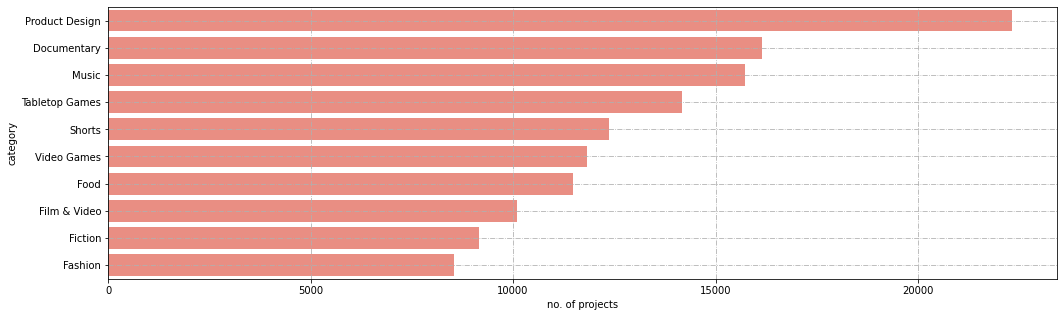

In [27]:
plt.figure(figsize=(17, 5))
sns.barplot(data=top10_num,
            x='no. of projects',
            y='category',
            color='salmon')
plt.grid(linestyle='-.')
plt.show()

In [28]:
# What is the difference in the number of projects between the top 1 and top 10 categories?
top10_num['no. of projects'].max() - top10_num['no. of projects'].min()

13755

In the Top 10 Categories by Number of Projects and plot the Total Pledged.

In [29]:
top10_cat = top10_num['category'].values
top10_cat

array(['Product Design', 'Documentary', 'Music', 'Tabletop Games',
       'Shorts', 'Video Games', 'Food', 'Film & Video', 'Fiction',
       'Fashion'], dtype=object)

In [30]:
top10_pledged = df[df['category'].isin(top10_cat)].groupby('category')['pledged'].sum().reset_index()
top10_pledged

,category,pledged
0,Documentary,1.389157e+08
1,Fashion,4.678221e+07
2,Fiction,1.321741e+07
3,Film & Video,4.708527e+07
4,Food,7.069181e+07
5,Music,7.006348e+07
6,Product Design,6.369915e+08
7,Shorts,4.154866e+07
8,Tabletop Games,4.637192e+08
9,Video Games,2.162537e+08


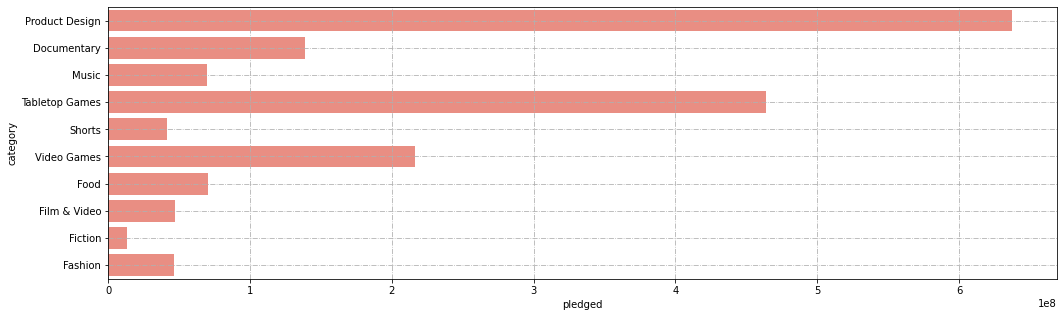

In [31]:
plt.figure(figsize=(17, 5))
sns.barplot(data=top10_pledged,
        y='category',
        x='pledged',
        order=top10_cat,
        color='salmon')
plt.grid(linestyle='-.')
plt.show()

In the Top 10 Categories by Number of Projects, plot the Average Pledge Per Project.

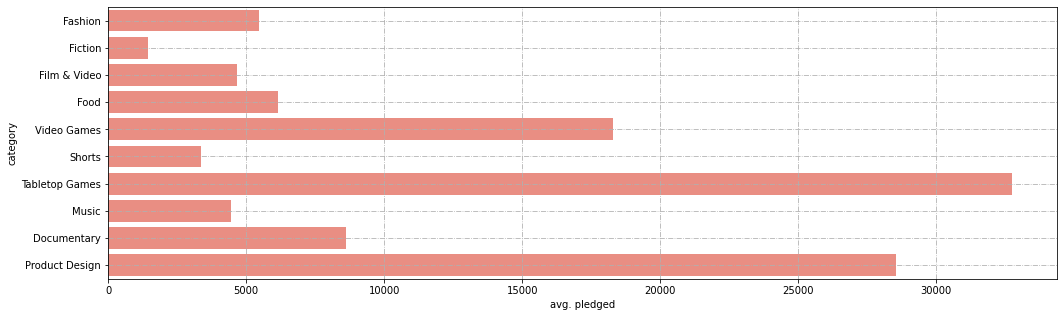

In [32]:
top10_ppp = df[df['category'].isin(top10_cat)].groupby('category')['pledged'].mean().reset_index()
top10_ppp.columns = ['category','avg. pledged']

plt.figure(figsize=(17, 5))
sns.barplot(data=top10_ppp,
            x='avg. pledged',
            y='category',
            order=top10_cat[::-1],
            color='salmon')
plt.grid(linestyle='-.')
plt.show()

In the Top 10 Categories by Number of Projects, plot number of projects broken down by their states (failed/successful)

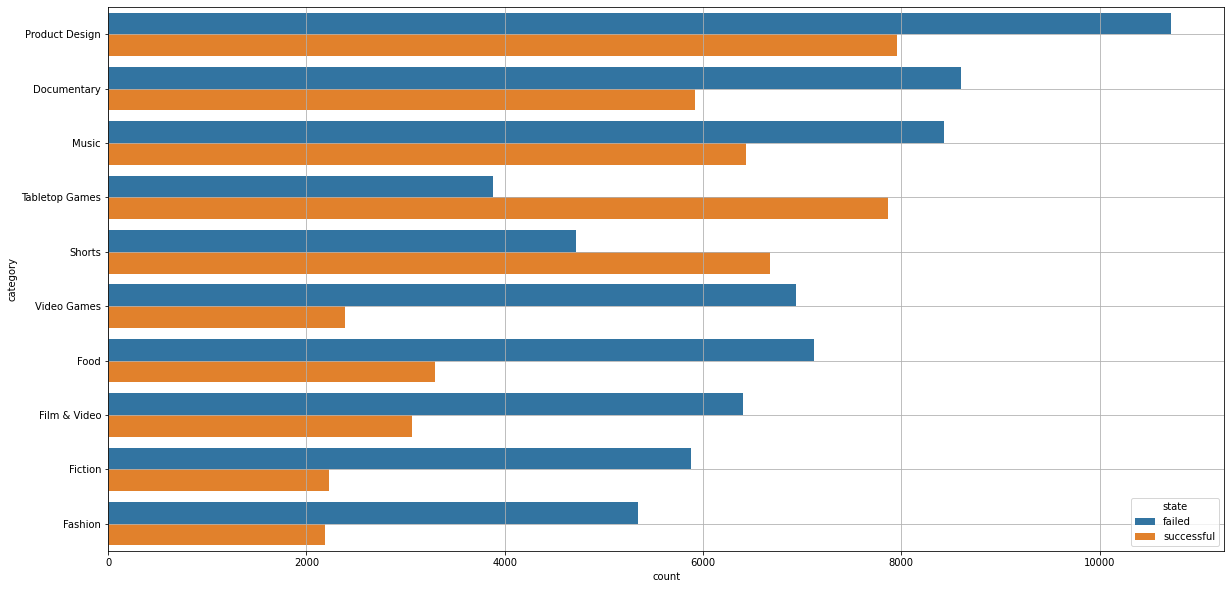

In [33]:
top10_data = df[df['category'].isin(top10_cat)]
plot_data = top10_data[top10_data['state'].isin(['successful', 'failed'])]

plt.figure(figsize=(20, 10))
sns.countplot(data = plot_data,
              y = 'category', 
              hue = 'state', 
              order=top10_cat)
plt.grid()
plt.show()

As you can see, in top 10 categorires, there're only 2 categories that have number of successful project more than failed project, they're TabletopGames and Shorts

Organize the above 4 charts into one figure with 4 subplots, following this layout: 

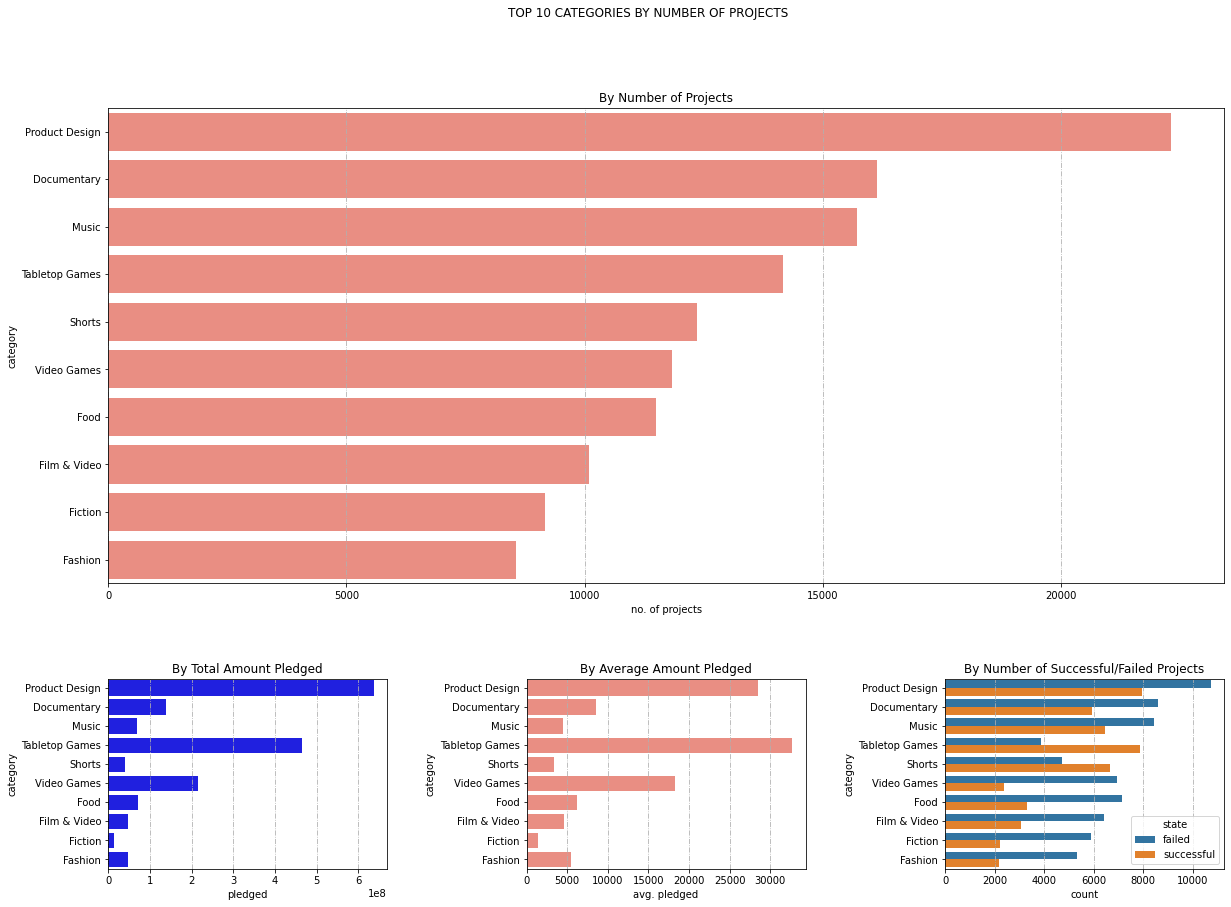

In [34]:
# Layout: https://matplotlib.org/3.3.3/tutorials/intermediate/gridspec.html

# Define layout
fig = plt.figure(constrained_layout=False, figsize=(20, 14))
fig.suptitle('TOP 10 CATEGORIES BY NUMBER OF PROJECTS')
gs = fig.add_gridspec(nrows=3, ncols=3, wspace=0.5, hspace=0.5)

# Creating the axes to put the plots on. Can you guess which axis correspond to which plot?
ax1 = fig.add_subplot(gs[:2, :])
ax2 = fig.add_subplot(gs[-1, 0])
ax3 = fig.add_subplot(gs[-1, 1])
ax4 = fig.add_subplot(gs[-1, 2])


##### BEGIN PLOTTING #####

# Total Plot
sns.barplot(data=top10_num,
            x='no. of projects',
            y='category',
            color='salmon',
            ax=ax1,
            order=top10_cat,) # This one is the BIG plot in the center
ax1.set_title('By Number of Projects')
ax1.grid(linestyle='-.', axis='x')


# Plot Total Pledged
sns.barplot(data=top10_pledged,
            x='pledged',
            y='category',
            color='blue',
            order=top10_cat,
            ax=ax2) # Bottom left
ax2.set_title('By Total Amount Pledged')
ax2.grid(linestyle='-.', axis='x')


# Plot Avg Pledged
sns.barplot(data=top10_ppp,
            x='avg. pledged',
            y='category',
            order=top10_cat,
            color='salmon',
            ax=ax3) # Bottom middle
ax3.set_title('By Average Amount Pledged')
ax3.grid(linestyle='-.', axis='x')


# Plot State Projects
sns.countplot(data = plot_data,
              y = 'category', 
              hue = 'state', 
              order=top10_cat,
              ax=ax4) # Bottom right
ax4.set_title('By Number of Successful/Failed Projects')
ax4.grid(linestyle='-.', axis='x')


plt.show()

### The trend of Number of Projects and  Success Rate over time?

In the Top 10 Categories by Number of Projects, plot the trend of ***Number of Projects*** over the years. 

In the Top 10 Category by Number of Projects, plot the trend of ***Success Rate*** over the year. 

Now combine the last 2 question in dual axis chart.

In [43]:
top10_data['launched_year'] = top10_data['launched'].dt.year

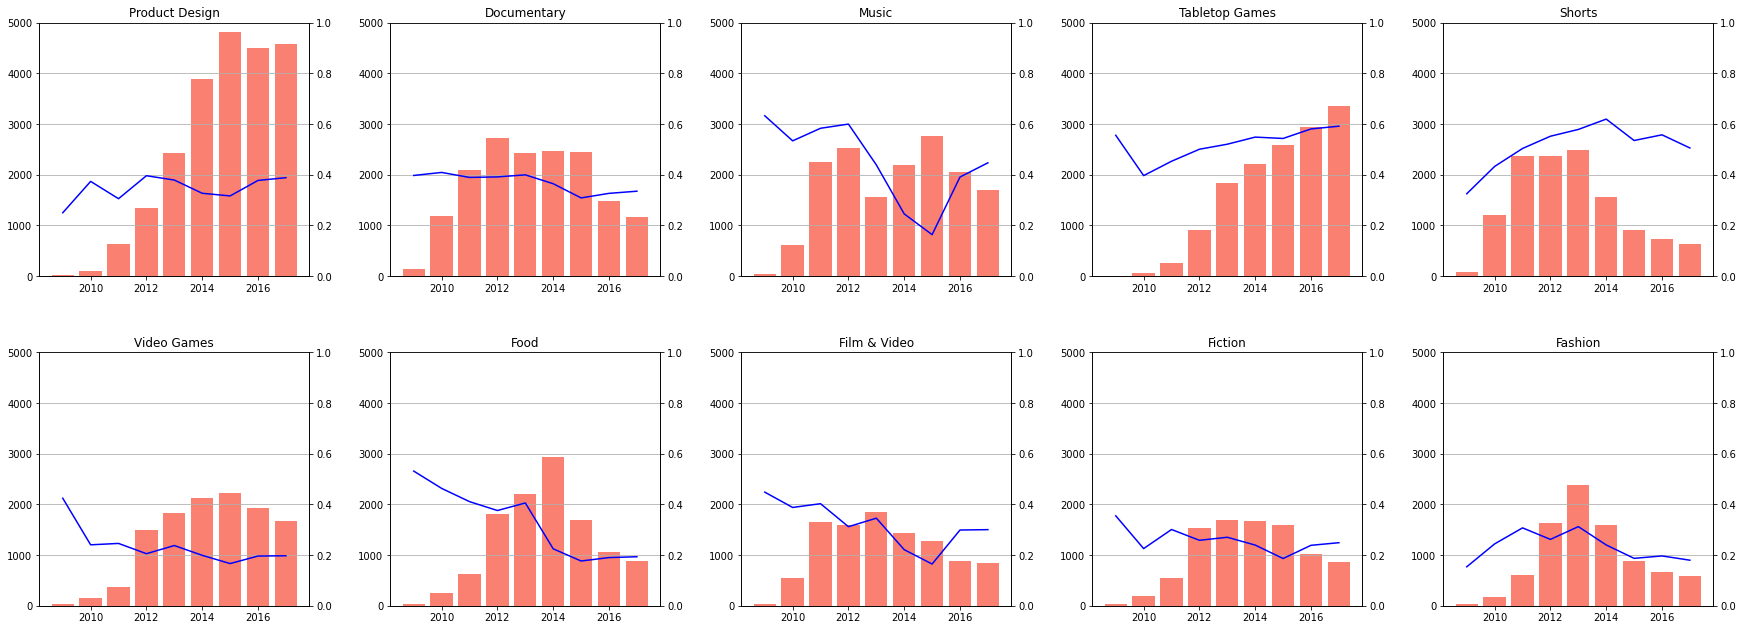

In [44]:
plt.figure(figsize=(30, 12))
for i in range(10):
    # Combine the two plots above here.
    # Remember how to combine two different plots into one with two different y-axis?
    cat = top10_cat[i]# what's the category for this loop?
    top10_current_cat = top10_data[top10_data['category']==cat]
    top10_current_cat['encode_state'] = top10_current_cat['state'] == 'successful'
    

    num_by_year = top10_current_cat.groupby('launched_year').size().reset_index()
    num_by_year.columns = ['launched_year', 'number of projects']

    success_year_rate = top10_current_cat.groupby('launched_year').mean()['encode_state'].reset_index()
    success_year_rate.columns = ['year', 'rate']


    plt.subplot(2,5,i+1)

    # Here, I use plt.bar just to keep it precise with the sample plot.
    # However, feel free to use seaborn as long as the data is the same.
    plt.bar(data=num_by_year,
            x='launched_year',
            height='number of projects',
            color='salmon')
    plt.ylim(0, 5000)
    
    plt.twinx() # Here is the magic line to make a dual-axes plot
    
    # HOWEVER, here if you use seaborn lineplot, you might've noticed that your
    # plot doesn't look quite right. This is a known bug of the interactions 
    # between seaborn and matplotlib.

    # To fix it, you can use seaborn pointplot instead of lineplot, OR, like
    # below, switch to plt.plot to match 100% the sample plot.
    plt.plot(success_year_rate['year'], # x-array
             success_year_rate['rate'], # y-array
             color='blue')
    plt.ylim(0, 1)
    
    plt.title(cat)
    plt.grid()

    plt.subplots_adjust(wspace=0.3, top=0.8, hspace=0.3)

Out of the top 10 categories with the highest number of projects, how many have a higher success rate in 2017 than in 2009?
The answer is 4: Product Design, TableTop Games, Shorts, Fashion


Similarly, in Top10 Categories based on Number of Projects, plot the trend of ***Number of Projects*** and the ***Success Rate*** over the ***MONTHS IN YEAR***.

In [38]:
# First, similar to when we created a new column 'launched_year' for questions 
# 6-8, here we create a new column 'launched_month' for the next plot.
top10_data['launched_month'] = top10_data['launched'].dt.month
top10_data['launched_month'].value_counts()

3     12255
7     12088
10    11973
11    11745
4     11414
6     11255
5     11180
8     10770
9     10709
2     10544
1      9794
12     8109
Name: launched_month, dtype: int64

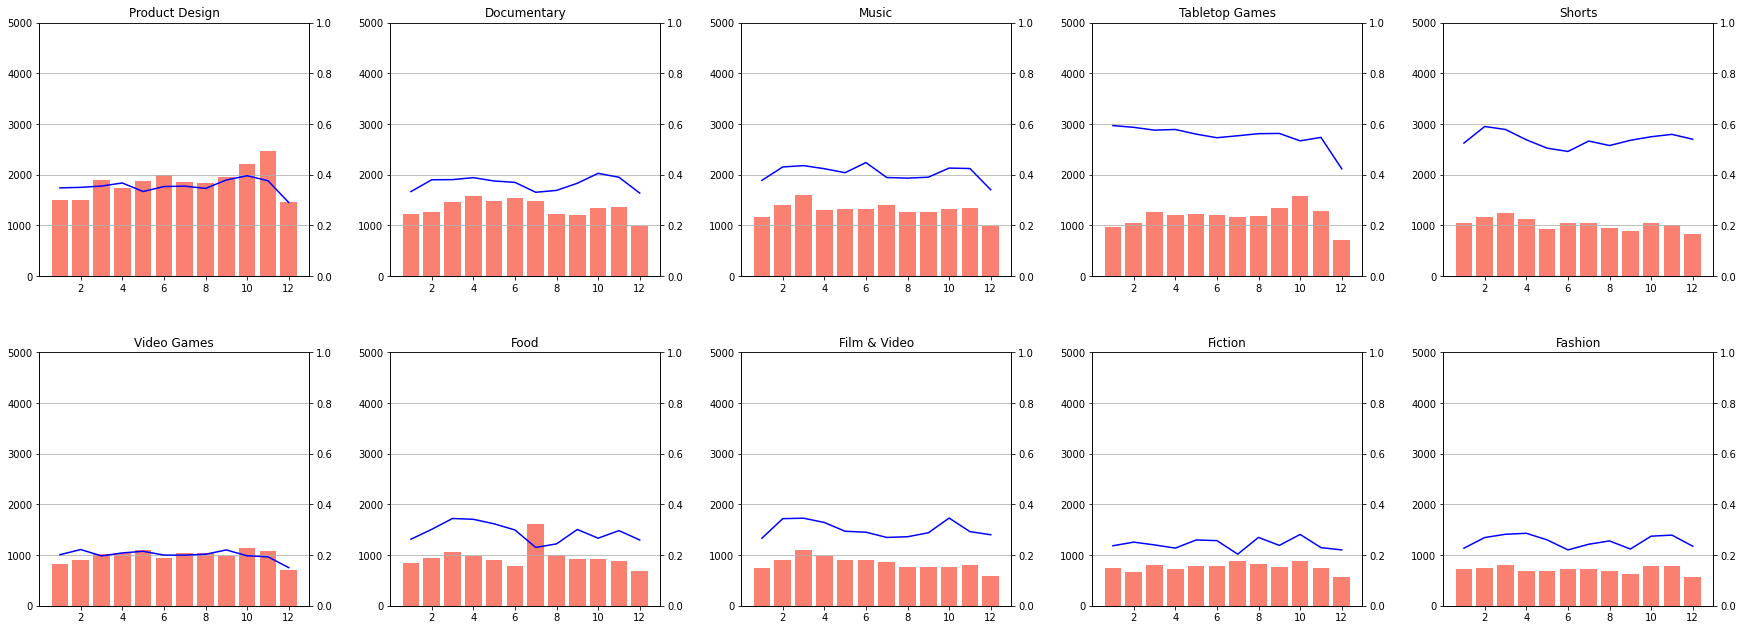

In [39]:
plt.figure(figsize=(30, 12))
for i in range(10):
    # NOTE: this is almost exactly the same code for the previous plot.
    # In fact, I just copied the plotting code from above and pasted here, and
    # then just change year --> month in the necessary places.

    cat = top10_cat[i]# what's the category for this loop?
    top10_current_cat = top10_data[top10_data['category']==cat]
    top10_current_cat['encode_state'] = top10_current_cat['state'] == 'successful'

    num_by_month = top10_current_cat.groupby('launched_month').size().reset_index()
    num_by_month.columns = ['launched_month', 'number of projects']

    success_month_rate = top10_current_cat.groupby('launched_month').mean()['encode_state'].reset_index()
    success_month_rate.columns = ['month', 'rate']


    plt.subplot(2,5,i+1)

    plt.bar(data=num_by_month,
            x='launched_month',
            height='number of projects',
            color='salmon')
    plt.ylim(0, 5000)
    
    plt.twinx()
    
    plt.plot(success_month_rate['month'],
             success_month_rate['rate'],
             color='blue')
    plt.ylim(0, 1)
    
    plt.title(cat)
    plt.grid()
    plt.subplots_adjust(wspace=0.3, top=0.8, hspace=0.3)

In Top 10 Categories based on Number of Projects, plot ***Number of Projects*** by duration of the pitch (the time difference between `launched` and `deadline`), and the trend of ***Success Rate*** by that duration.

The duration is in number of months.

In [40]:
top10_data['duration'] = (top10_data['deadline'] - top10_data['launched']) / pd.to_timedelta(30, 'D')
top10_data['duration'] = top10_data['duration'].astype('int')
top10_data['duration'].value_counts()

0    80296
1    49190
2     2107
3      243
Name: duration, dtype: int64

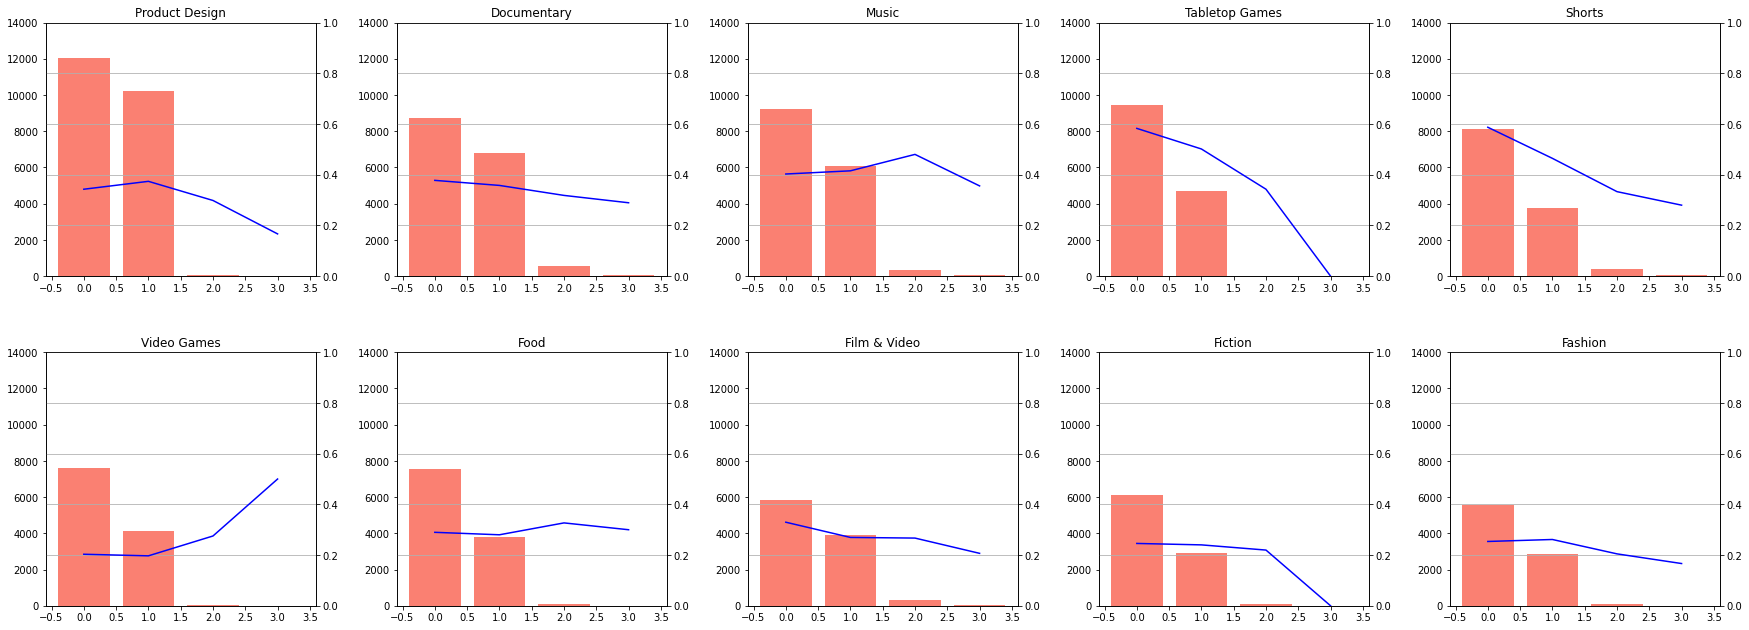

In [41]:
plt.figure(figsize=(30, 12))
for i in range(10):
    # YOUR CODE HERE
    # Combine the two plots above here.
    # Remember how to combine two different plots into one with two different y-axis?
    cat = top10_cat[i]# what's the category for this loop?
    top10_current_cat = top10_data[top10_data['category']==cat]
    top10_current_cat['encode_state'] = top10_current_cat['state'] == 'successful'

    num_by_duration = top10_current_cat.groupby('duration').size().reset_index()
    num_by_duration.columns = ['duration', 'number of projects']

    success_duration_rate = top10_current_cat.groupby('duration').mean()['encode_state'].reset_index()
    success_duration_rate.columns = ['duration', 'rate']


    plt.subplot(2,5,i+1)

    plt.bar(data=num_by_duration,
            x='duration',
            height='number of projects',
            color='salmon')
    plt.ylim(0, 14000)
    
    plt.twinx()
    
    plt.plot(success_duration_rate['duration'],
             success_duration_rate['rate'],
             color='blue')
    plt.ylim(0, 1)
    
    plt.title(cat)
    plt.grid()
    plt.subplots_adjust(wspace=0.3, top=0.8, hspace=0.3)